In [1]:
%pip install vaderSentiment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
print("imported")


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python310.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
imported


# Import the data

In [3]:
df= pd.read_csv('News_Data\combined_News_output.csv')
df.head(10)

,text,likes,comments,shares,source,label
0,“Numbers dropped by around half after the eart...,303,15,5,al_jazeera,1
1,This exclusive footage obtained by Al Jazeera ...,809,174,81,al_jazeera,1
2,The disappearance of 6-year-old Joshlin Smith ...,236,75,33,al_jazeera,1
3,Millions are still suffering the pandemic’s li...,87,11,11,al_jazeera,1
4,Multan Sultans face Peshawar Zalmi in the Paki...,522,71,5,al_jazeera,1
5,The International Energy Agency says global oi...,267,84,33,al_jazeera,1
6,Leader Kim Jong Un has joined North Korean sol...,568,278,38,al_jazeera,1
7,Carlos Belo is a Nobel Peace Prize winner and ...,91,25,16,al_jazeera,1
8,The Israeli army has admitted mistaking a bicy...,620,325,195,al_jazeera,1
9,"Why has the US passed a bill to ban TikTok, an...",239,194,37,al_jazeera,1


# Data Understanding Starts

In [4]:
df.shape

(4944, 6)

In [5]:
df.dtypes

text        object
likes        int64
comments     int64
shares       int64
source      object
label        int64
dtype: object

In [6]:
df.describe(include='all')

,text,likes,comments,shares,source,label
count,4925,4944.000000,4944.000000,4944.000000,4944,4944.000000
unique,4847,NaN,NaN,NaN,5,NaN
top,There is no increase in the petroleum prices,NaN,NaN,NaN,"al_jazeera,Fox_News,RT_News,APPS_News",NaN
freq,31,NaN,NaN,NaN,1191,NaN
mean,NaN,442.100728,163.160599,50.423544,NaN,0.759102
std,NaN,1351.948924,298.429835,132.355437,NaN,0.427672
min,NaN,3.000000,0.000000,0.000000,NaN,0.000000
25%,NaN,17.000000,13.000000,7.000000,NaN,1.000000
50%,NaN,190.000000,55.000000,19.000000,NaN,1.000000
75%,NaN,433.000000,194.250000,50.000000,NaN,1.000000


# Data Cleaning

In [7]:
df.isna() .sum()

text        19
likes        0
comments     0
shares       0
source       0
label        0
dtype: int64

In [8]:
df.dropna(how='any', inplace=True)
df.isna() .sum()

text        0
likes       0
comments    0
shares      0
source      0
label       0
dtype: int64

In [9]:
df.duplicated() .sum()

0

In [13]:
df

,text,likes,comments,shares,source,label
0,“Numbers dropped by around half after the eart...,303,15,5,al_jazeera,1
1,This exclusive footage obtained by Al Jazeera ...,809,174,81,al_jazeera,1
2,The disappearance of 6-year-old Joshlin Smith ...,236,75,33,al_jazeera,1
3,Millions are still suffering the pandemic’s li...,87,11,11,al_jazeera,1
4,Multan Sultans face Peshawar Zalmi in the Paki...,522,71,5,al_jazeera,1
...,...,...,...,...,...,...
3748,China's top legislators vowed to enact a slew ...,31,1,7,reuters,1
3749,As the US Congress struggles to pass legislati...,78,46,7,reuters,1
3750,President Joe Biden's State of the Union addre...,49,37,4,reuters,1
3751,Australia's Great Barrier Reef has been hit by...,54,4,10,reuters,1


# Data Analysis

In [10]:
analyzer = SentimentIntensityAnalyzer()
def get_sentiment_score(text):
    text_str = str(text)  
    return analyzer.polarity_scores(text_str)['compound']

df['sentiment_score'] = df['text'].apply(get_sentiment_score)

df.head(15)

,text,likes,comments,shares,source,label,sentiment_score
0,“Numbers dropped by around half after the eart...,303,15,5,al_jazeera,1,0.0000
1,This exclusive footage obtained by Al Jazeera ...,809,174,81,al_jazeera,1,-0.4939
2,The disappearance of 6-year-old Joshlin Smith ...,236,75,33,al_jazeera,1,-0.2023
3,Millions are still suffering the pandemic’s li...,87,11,11,al_jazeera,1,-0.8225
4,Multan Sultans face Peshawar Zalmi in the Paki...,522,71,5,al_jazeera,1,0.5994
5,The International Energy Agency says global oi...,267,84,33,al_jazeera,1,-0.2023
6,Leader Kim Jong Un has joined North Korean sol...,568,278,38,al_jazeera,1,-0.3818
7,Carlos Belo is a Nobel Peace Prize winner and ...,91,25,16,al_jazeera,1,-0.7050
8,The Israeli army has admitted mistaking a bicy...,620,325,195,al_jazeera,1,-0.8481
9,"Why has the US passed a bill to ban TikTok, an...",239,194,37,al_jazeera,1,-0.5574


In [11]:
def score_to_sentiment(score, threshold=0.1):
    if score >= threshold:
        return 'Positive'
    elif score <= -threshold:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['sentiment_score'].apply(score_to_sentiment)

df.head(5)

,text,likes,comments,shares,source,label,sentiment_score,Sentiment
0,“Numbers dropped by around half after the eart...,303,15,5,al_jazeera,1,0.0000,Neutral
1,This exclusive footage obtained by Al Jazeera ...,809,174,81,al_jazeera,1,-0.4939,Negative
2,The disappearance of 6-year-old Joshlin Smith ...,236,75,33,al_jazeera,1,-0.2023,Negative
3,Millions are still suffering the pandemic’s li...,87,11,11,al_jazeera,1,-0.8225,Negative
4,Multan Sultans face Peshawar Zalmi in the Paki...,522,71,5,al_jazeera,1,0.5994,Positive


# Data Visualization

### overall sentiment expressed in the posts shared by all news channel!

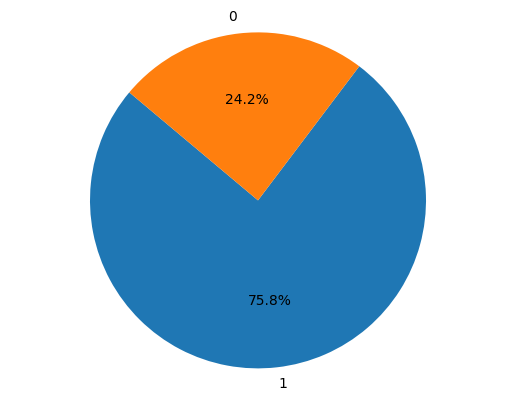

In [26]:
plt.pie(df['label'].value_counts(), labels={1:"real",0:"Fake"}, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.show()

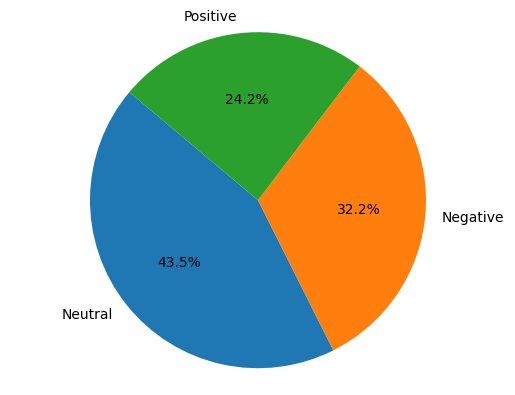

In [21]:
plt.pie(df['Sentiment'].value_counts(), labels=df['Sentiment'].unique(), autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.show()

### News channel tends to have the most positive,negative and sentiment in their social media posts!


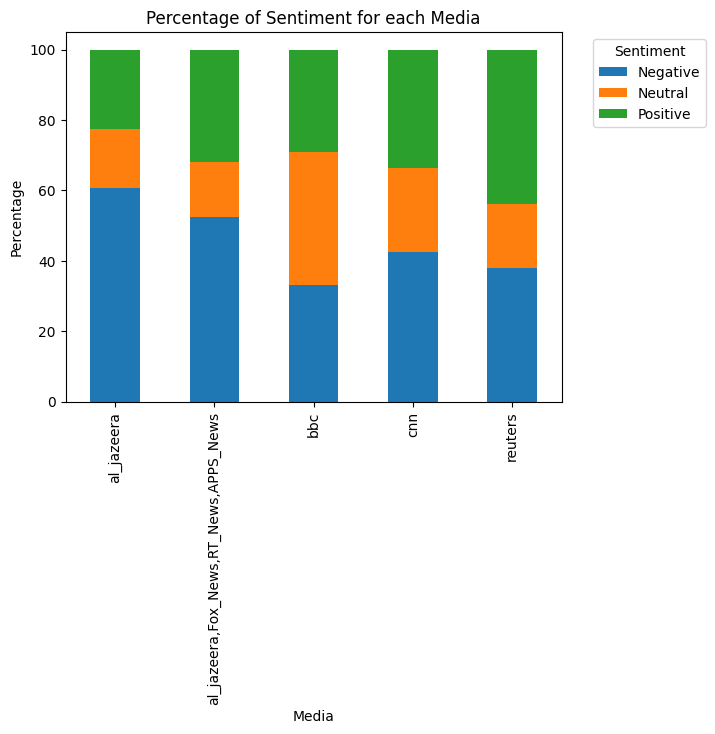

In [13]:
sentiment_counts = df.groupby(['source', 'Sentiment']).size().unstack(fill_value=0)
sentiment_percentages = sentiment_counts.div(sentiment_counts.sum(axis=1), axis=0) * 100

sentiment_percentages.plot(kind='bar', stacked=True)
plt.xlabel('Media')
plt.ylabel('Percentage')
plt.title('Percentage of Sentiment for each Media')
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

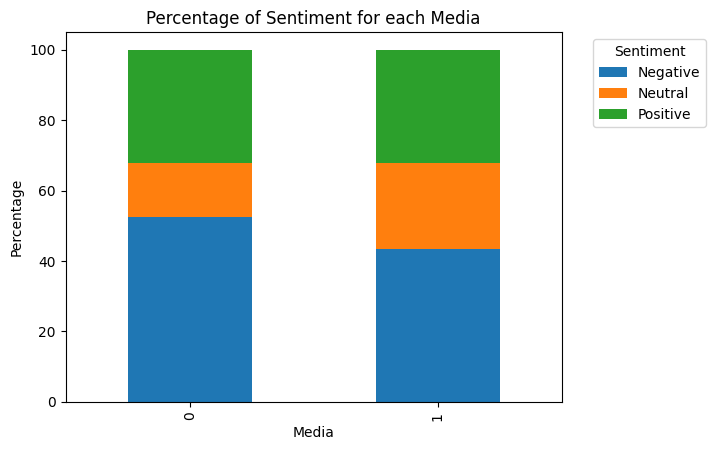

In [14]:
sentiment_counts = df.groupby(['label', 'Sentiment']).size().unstack(fill_value=0)
sentiment_percentages = sentiment_counts.div(sentiment_counts.sum(axis=1), axis=0) * 100

sentiment_percentages.plot(kind='bar', stacked=True)
plt.xlabel('Label')
plt.ylabel('Percentage')
plt.title('Percentage of Sentiment for each Label Dataset')
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Engagement metrics such as likes, comments, and shares correlate with the sentiment of the posts? 

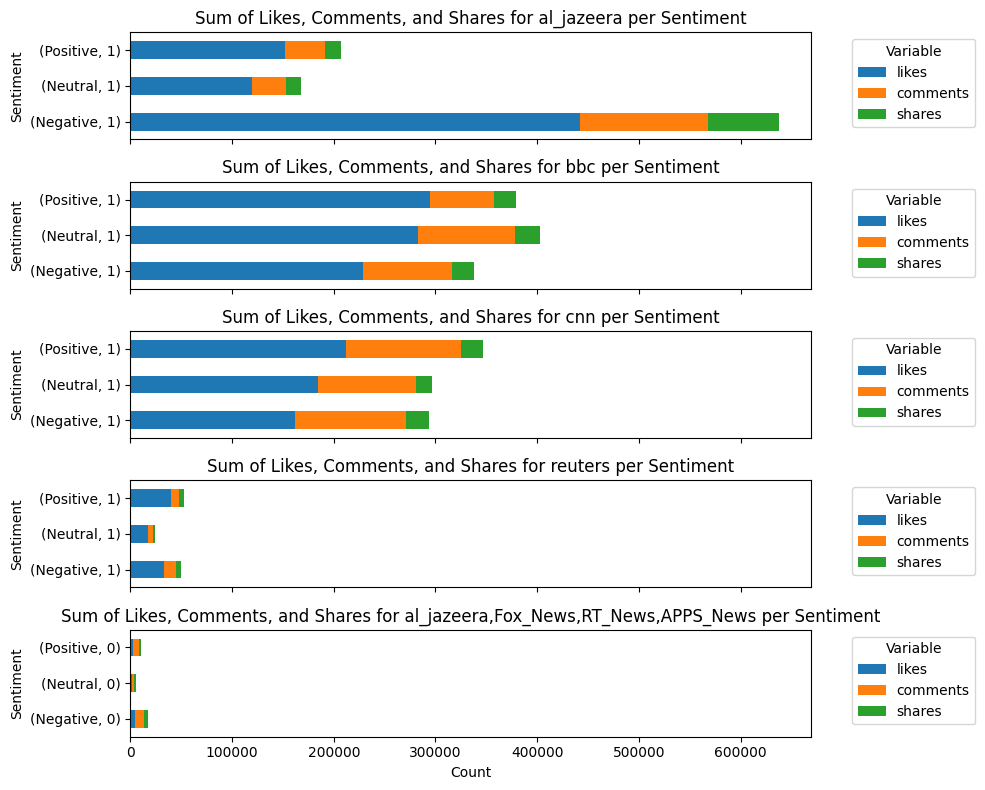

In [18]:
media_ids = df['source'].unique()


fig, axs = plt.subplots(nrows=len(media_ids), figsize=(10, 8), sharex=True)


for i, media_id in enumerate(media_ids):
    media_df = df[df['source'] == media_id]
    
    variables_sum = media_df.groupby(['Sentiment','label'])[['likes', 'comments', 'shares']].sum()    
    variables_sum.plot(kind='barh', stacked=True, ax=axs[i])
    axs[i].set_xlabel('Count')
    axs[i].set_ylabel('Sentiment')
    axs[i].set_title(f'Sum of Likes, Comments, and Shares for {media_id} per Sentiment')
    axs[i].legend(title='Variable', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Frequency of Positive and Negative Word used.

In [19]:
df['Sentiment'].value_counts()

Sentiment
Negative    2250
Positive    1586
Neutral     1089
Name: count, dtype: int64

#### 4.1 Top word used in Positive posts

In [20]:
Positive_df = df[df['Sentiment'] == 'Positive'][['text', 'Sentiment']]
Positive_df

,text,Sentiment
4,Multan Sultans face Peshawar Zalmi in the Paki...,Positive
17,"“I totally disagree with Netanyahu,” former he...",Positive
18,🔴 The Yemen-based Houthis have successfully te...,Positive
23,The country scaled back its military capabilit...,Positive
26,From Israeli raids in the occupied West Bank t...,Positive
...,...,...
4918,The United States is not planning to send troo...,Positive
4925,"The fake news generated is - ""The injuries are...",Positive
4936,"Biden Slammed for Ignoring Energy Crisis, as G...",Positive
4940,"Original news text: ""There is a significant in...",Positive


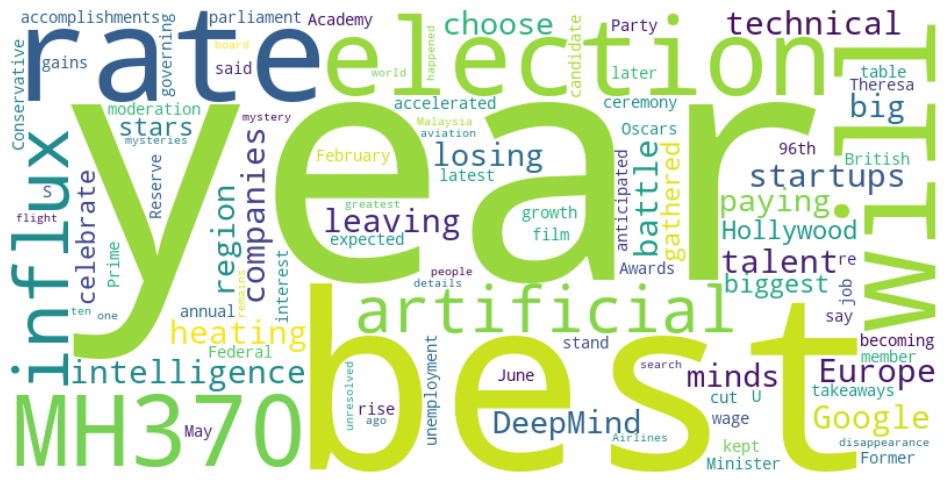

In [28]:
top_strings = Positive_df['text'].value_counts().head().index.tolist()
text = " ".join(top_strings)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


The visualization above shows the words that were used the most in positive posts.

#### 4.2 Top words use Negative Posts 

In [21]:
Negative_df = df[df['Sentiment'] == 'Negative'][['text', 'Sentiment']]
Negative_df

,text,Sentiment
1,This exclusive footage obtained by Al Jazeera ...,Negative
2,The disappearance of 6-year-old Joshlin Smith ...,Negative
3,Millions are still suffering the pandemic’s li...,Negative
5,The International Energy Agency says global oi...,Negative
6,Leader Kim Jong Un has joined North Korean sol...,Negative
...,...,...
4937,"No, this is false. There has been no increase ...",Negative
4938,There is no evidence that the petroleum prices...,Negative
4939,There is no increase in the petroleum prices.,Negative
4941,"There is no increase in the petroleum prices, ...",Negative


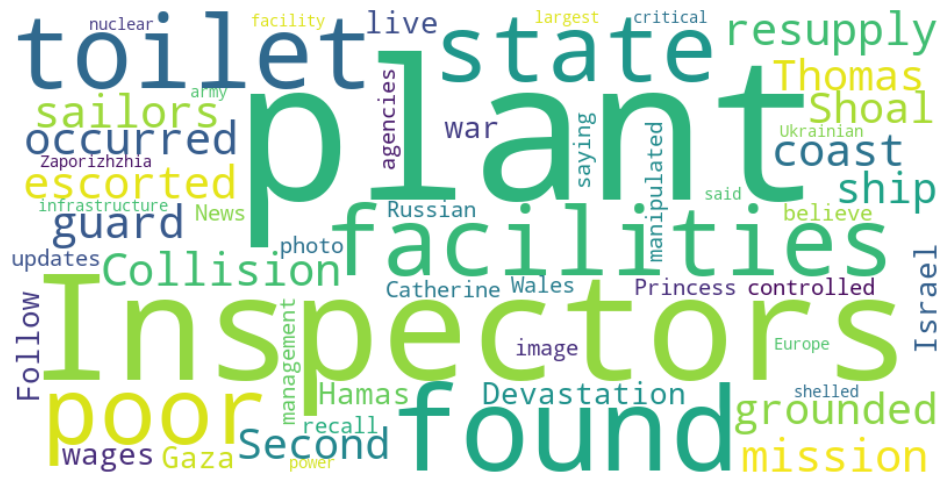

In [32]:
top_strings = Negative_df['text'].value_counts().head().index.tolist()
text = " ".join(top_strings)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


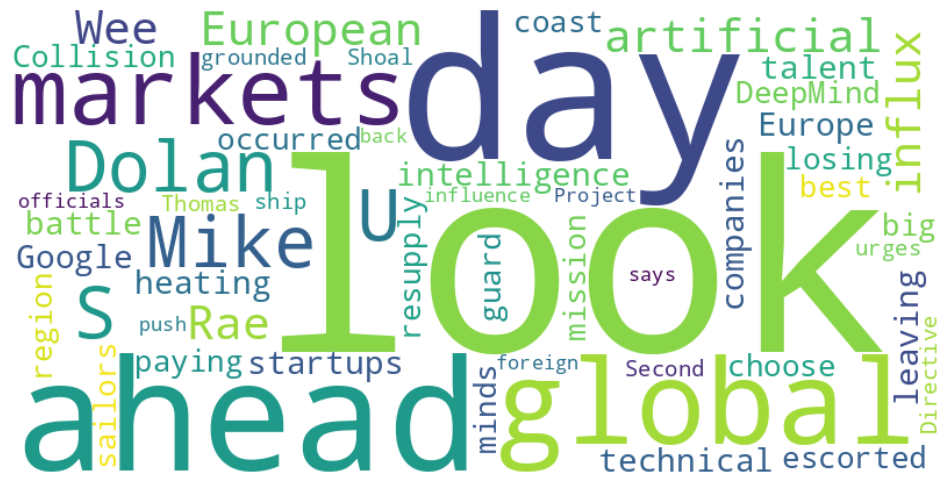

In [23]:
positive_df = df[df['label'] == 1][['text', 'Sentiment']]
top_strings = positive_df ['text'].value_counts().head().index.tolist()
text = " ".join(top_strings)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

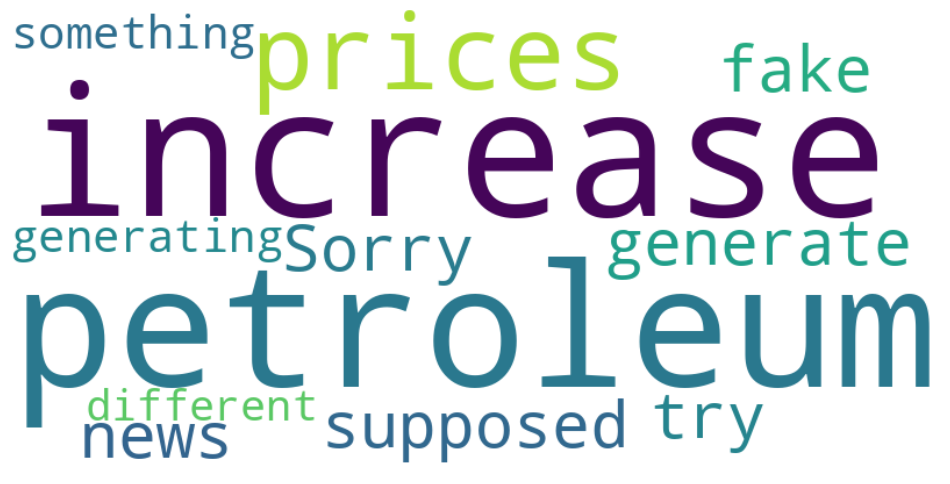

In [24]:
false_df = df[df['label'] == 0][['text', 'Sentiment']]
top_strings = false_df ['text'].value_counts().head().index.tolist()
text = " ".join(top_strings)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

The visualization above shows the words that were used the most in negative posts.